# Additional ressources

* Bishop, C. M. (2006). Pattern recognition. Machine learning, 128(9).
    * 1.1: Example: Polynomial Curve Fitting

# Import and definitions

Let's import the same libraries as previous notebook.
We got rid of Numpy as we will now proceed only using PyTorch. We just import the pi value from the math library to generate some sinusoidal data.

In [1]:
import torch
from math import pi
import matplotlib.pyplot as plt

# Get the order of colors for pretty plot
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Let's also define from the get go our training function, using the same elements as defined in the previous notebook.It will also return a list of loss values as introduced in the "bonus" section.

In [2]:
def train(x, y, model, optimizer, loss_fn, epochs):
    
    loss_list = []
    
    for i in range(epochs):
        y_pred = model(x)   # Forward prediction
        loss = loss_fn(y_pred, y)     # Compute the loss
        optimizer.zero_grad()   # Reinitialize the gradients
        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.item())
    
    return loss_list

# The problem with previous approach

## Defining simple model

First, let's bring back the simple 1 neuron model without non-linear activation that we used in the previous notebook.

In [3]:
model_simple = torch.nn.Linear(1, 1)   # 1 input, 1 output
optimizer_simple = torch.optim.SGD(model_simple.parameters(), lr=0.1)

In [4]:
loss_fn = torch.nn.MSELoss()

## Linear data

In [5]:
x = torch.linspace(-pi, pi, 1000)
x = x.unsqueeze(-1)     # Adapting the shape [1000] to [1000, 1]

# Linear data
w = -0.5
b = 1
y = w * x + b + torch.normal(mean=torch.zeros(x.size()), std=0.25)

In [6]:
error_list_1 = train(x, y, model_simple, optimizer_simple, loss_fn, 100)

In [7]:
y_learned_1 = model_simple(x)
y_learned_1 = y_learned_1.detach()

Now that we trained the network, let's check how well it fits the data and how does the loss look.
Since we will look at the same type of figure all the time, let's make a function that makes

In [8]:
def make_figure(x, y, y_learned, error_list):
    # Define the figure
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    
    # Check the fit after the training
    axs[0].scatter(x, y, color=colors[7], marker='.',
                   alpha=0.3, label='Training data')
    axs[0].plot(x, y_learned, label='Learned parameters')
    axs[0].set(xlabel='x', ylabel='y')
    axs[0].legend()

    # Check the error over the training
    axs[1].plot(error_list)
    axs[1].set(xlabel='Epoch', ylabel='Mean MSELoss')
    fig.tight_layout()

    return fig, axs

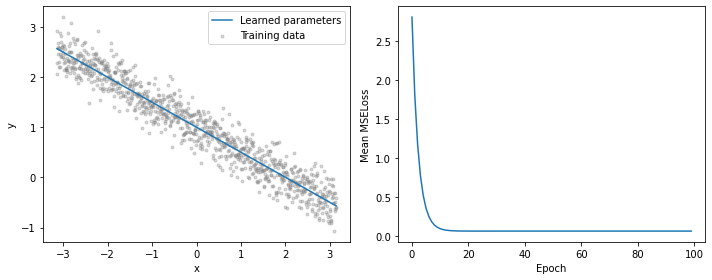

In [9]:
fig1, axs1 = make_figure(x, y, y_learned_1, error_list_1)
plt.show()

## More complex data

In [10]:
y2 = torch.sin(x) + torch.normal(mean=torch.zeros(x.size()), std=0.25)

In [11]:
error_list_2 = train(x, y2, model_simple, optimizer_simple, loss_fn, 100)

In [12]:
y_learned_2 = model_simple(x)
y_learned_2 = y_learned_2.detach()

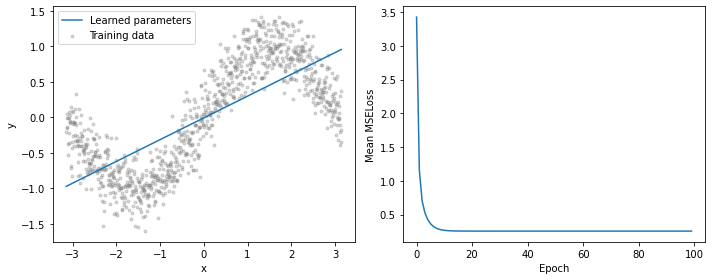

In [13]:
fig2, axs2 = make_figure(x, y2, y_learned_2, error_list_2)
plt.show()

# A more general model

Our first, one-neuron model, fails at representing more complex relations. This comes from two factors:
* There is only one neuron
* There is no non-linearity

In order to capture arbitrary relations

In [14]:
model_general = torch.nn.Sequential(
    torch.nn.Linear(1, 10),     # 1 input, 10 hidden nodes
    torch.nn.Sigmoid(),         # Non-linear activation
    torch.nn.Linear(10, 1),     # 10 hidden nods, 1 output
    )

optimizer_general = torch.optim.SGD(model_general.parameters(), lr=0.1)

In [15]:
error_list_3 = train(x, y2, model_general, optimizer_general, loss_fn, 10000)

In [16]:
y_learned_3 = model_general(x)
y_learned_3 = y_learned_3.detach()

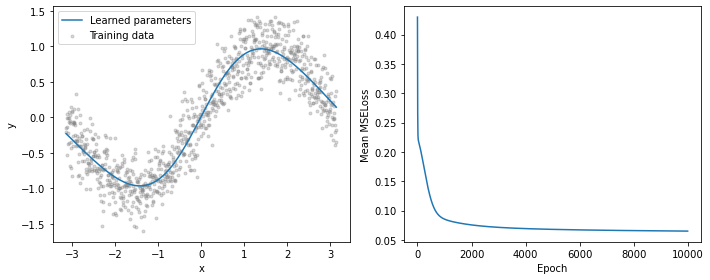

In [17]:
fig3, axs3 = make_figure(x, y2, y_learned_3, error_list_3)
plt.show()

# Bonus: Intro to hyperparameter optimization

## Number of neurons

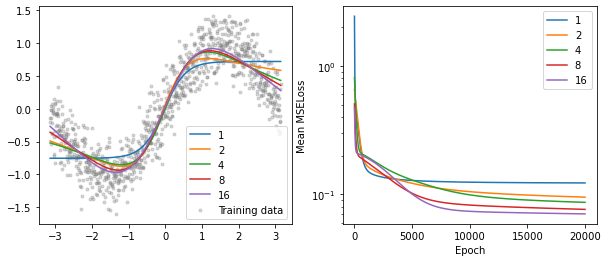

In [18]:
nb_neurons_list = [2**i for i in range(5)]

fig4, axs4 = plt.subplots(1, 2, figsize=(10, 4))
axs4[0].scatter(x, y2, color=colors[7],marker='.',
                alpha=0.3, label='Training data')

for nb_neurons in nb_neurons_list:
    # Define new model with different number of neurons
    model_temp = torch.nn.Sequential(
        torch.nn.Linear(1, nb_neurons),     # 1 input
        torch.nn.Sigmoid(),         
        torch.nn.Linear(nb_neurons, 1),     # 1 output
    )
    # Don't forget to re-define the optimizer too! 
    optimizer_temp = torch.optim.SGD(model_temp.parameters(), lr=0.01)
    
    # Training
    error_list_temp = train(x, y2, model_temp, optimizer_temp, loss_fn, 20000)
    
    # Make the prediction
    y_learned = model_temp(x)
    y_learned = y_learned.detach()
    
    # Update the plot
    axs4[0].plot(x, y_learned, label=nb_neurons)
    axs4[1].plot(error_list_temp, label=nb_neurons)
    
axs4[0].legend()
axs4[1].legend()
axs4[1].set(xlabel='Epoch', ylabel='Mean MSELoss', yscale='log')
fig4.tight_layout()
plt.show()

## Learning rate

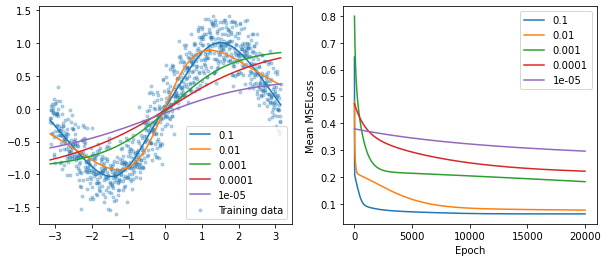

In [19]:
lr_list = [10**i for i in range(-1, -6, -1)]

fig5, axs5 = plt.subplots(1, 2, figsize=(10, 4))
axs5[0].scatter(x, y2, marker='.', alpha=0.3, label='Training data')

for lr in lr_list:
    # Re-define the model
    model_temp = torch.nn.Sequential(
        torch.nn.Linear(1, 8),     # 1 input
        torch.nn.Sigmoid(),         
        torch.nn.Linear(8, 1),     # 1 output
    )
    # New optimizer with varying learning rate 
    optimizer_temp = torch.optim.SGD(model_temp.parameters(), lr=lr)
    
    # Training
    error_list_temp = train(x, y2, model_temp, optimizer_temp, loss_fn, 20000)
    
    # Make the prediction
    y_learned = model_temp(x)
    y_learned = y_learned.detach()
    
    # Update the plot
    axs5[0].plot(x, y_learned, label=lr)
    axs5[1].plot(error_list_temp, label=lr)
    
axs5[0].legend()
axs5[1].legend()
axs5[1].set(xlabel='Epoch', ylabel='Mean MSELoss') 
fig5.tight_layout()
plt.show()

## To go further

To improve the performance of the network there are many parameters that can be tuned. Here we introduced briefly how the number of neurons and the learning rate can affect the performance and speed of the training. Some other parameters that may be good to explore are:
* Number of layers. What is best? A single layer with many neurons or multiple layers with a smaller number of neurons? Even though in theory one layer with non-linear activation should do the trick there must be a reason why people build "deep" networks with many layers.
* The non-linear activation function. We used `torch.nn.Sigmoid()`, but these days `torch.nn.ReLU()`, is commonly used. Does it affect the training?
* The optimizer. So far we used the standard gradient descent, `torch.optim.SGD()`. However, there are other alternatives, some with advanced tricks to improve the training, such as an adaptive learning rate. A common example is `torch.optim.Adam()`.

So play around, get familiar with the workflow of dealing with the data, building a network, training, and visualizing the results / checking the performance. Tweak a few things, etc.